<a href="https://colab.research.google.com/github/Tru-coder/DemoProject/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Untitled3_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Подключение необходимых библиотек

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

 Одномерное финитное преобразование Фурье с помощью применения
алгоритма БПФ.

Задаём начальные условия

In [ ]:
a1 = -5
a2 = 5

N = 2**10
M = 2**16

b2 = (N * N) / (4 * a2 * M)
b1 = -b2

x = np.linspace(a1, a2, N, endpoint=False)
u = np.linspace(b1, b2, N, endpoint=False)

X, Y = np.meshgrid(x, x)

hx = (a2 - a1) / N

Реализация БПФ

In [ ]:
def bpf(ff, NN, MM, hx):
  k = (MM - NN) // 2
  F = np.insert(ff, 0, np.zeros(k))
  F = np.append(F, np.zeros(k))

  F = np.fft.fftshift(F)
  F = np.fft.fft(F) * hx
  F = np.fft.fftshift(F)

  F = F[len(F) // 2 - NN // 2: len(F) // 2 + NN // 2]
  return F

Аналитическое прямое преобразование Фурье

In [ ]:
# integration furie
def chisl(f):
    h_x = 2*a2 / N
    h_u = 2*b2 / N
    F = 0
    arr_F = []
    for i_u in range(N):
        for i_x in range (N):
           F += h_x * (f[i_x]) * np.exp(-2 * np.pi * 1j * x[i_x] * (-b2 + i_u * h_u))
        arr_F.append(F)
        F = 0
    return arr_F

Задание функций. Гауссов пучок $e^{-x^2}$

In [ ]:
#gauss
gauss = lambda x: np.exp(-x ** 2)

#gauss-original
f_gauss = gauss(x)

#gauss-after-bpf
F_gauss = bpf(f_gauss, N, M, hx)

#gauss-after-integral-method
F_gauss_ch = chisl(f_gauss)

Функция изображения одномерного графика

In [ ]:
def plot1_1d(ff,xx, strA, strP):
    # График 1
    plt.figure(figsize=(20,10))
    plt.subplot(2, 2, 1)
    plt.plot(xx, np.abs(ff))
    plt.title(strA)
    plt.grid()
    # График 2
    plt.subplot(2, 2, 2)
    plt.plot(xx, np.angle(ff))
    plt.title(strP)
    plt.grid()

Построить график гауссова пучка $e^{-x^2}$. Графики амплитуды и фазы

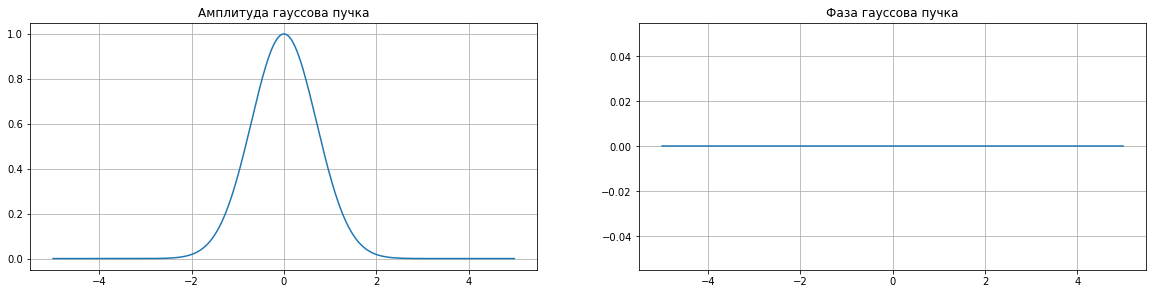

In [ ]:
#original gauss
plot1_1d(f_gauss, x,'Амплитуда гауссова пучка','Фаза гауссова пучка')

Построить график гауссова пучка $e^{-x^2}$. Графики амплитуды и фазы. После БПФ (быстрое преобразование Фурье)

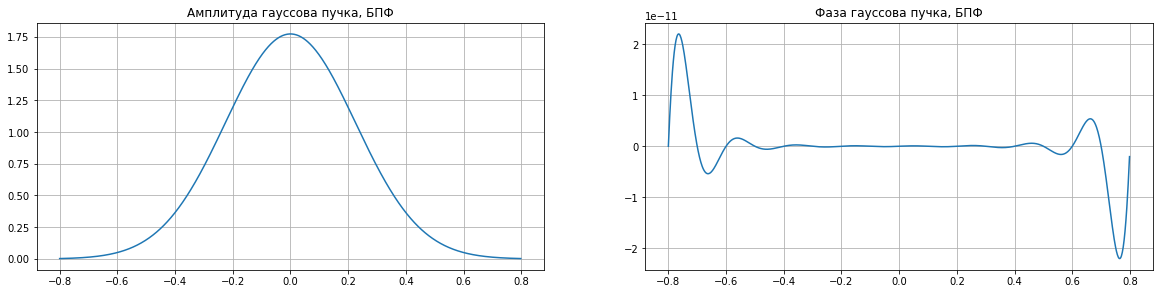

In [ ]:
#gauss after bpf
plot1_1d(F_gauss, u,'Амплитуда гауссова пучка, БПФ','Фаза гауссова пучка, БПФ')

 Реализовать финитное преобразование Фурье стандартным методом численного 
интегрирования (например, методом прямоугольников).

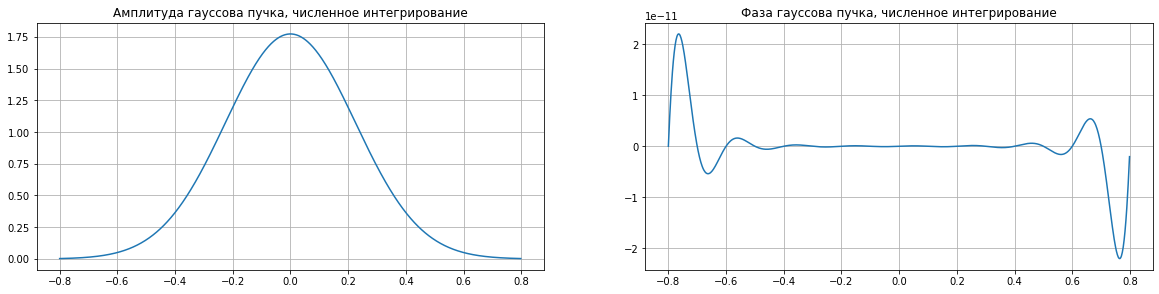

In [ ]:
#gauss after chisl
plot1_1d(F_gauss_ch, u,'Амплитуда гауссова пучка, численное интегрирование','Фаза гауссова пучка, численное интегрирование')

Построить результаты двух разных реализаций преобразования на одном 
изображении (одно для амплитуды, одно для фазы) и убедиться, что они совпадают.

*Изображение двух функций на одной плоскости

In [ ]:
def plot2_1d(ff1, ff2, xx, strA, strP, l1, l2):
    #График 1
    plt.figure(figsize=(20,10))
    plt.subplot(2, 2, 1)
    plt.plot(xx, np.abs(ff1), label = l1, c = 'c', lw = 10)
    plt.plot(xx, np.abs(ff2), label = l2, c = 'k', lw = 3)
    plt.title(strA)
    plt.legend()
    plt.grid()
    # График 2
    plt.subplot(2, 2, 2)
    plt.plot(xx, np.angle(ff1), label = l1, c = 'c', lw = 10)
    plt.plot(xx, np.angle(ff2), label = l2, c = 'k', lw = 3)
    plt.title(strP)
    plt.legend()
    plt.grid()

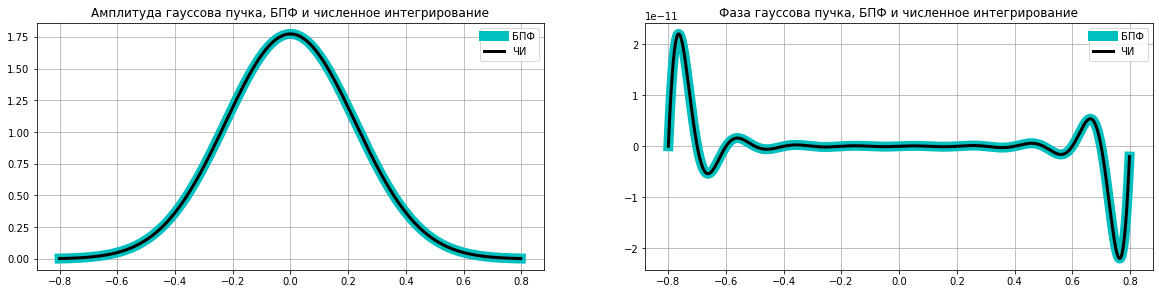

In [ ]:
plot2_1d(F_gauss, F_gauss_ch, u,'Амплитуда гауссова пучка, БПФ и численное интегрирование','Фаза гауссова пучка, БПФ и численное интегрирование', 'БПФ', 'ЧИ')

Используя первую реализацию преобразования, подать на вход световое поле, 
отличное от гауссова пучка, в соответствии со своим вариантом (таблица 1). 
Построить графики самого пучка и результата преобразования

*График функции

In [ ]:
from numpy import linspace, sqrt, sin, exp, convolve, abs, where
...
# Прямоугольная функция
def rect(x):
    return where(abs(x)<=0.5, 1, 0)


0
1
1
1
1
1
